In [58]:
import os, sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

warnings.filterwarnings("ignore")

### Read Housing CSV Dataset as a pandas dataframe 

In [20]:
house_df = pd.read_csv("Housing.csv")

In [71]:
# Display the first few rows of the dataframe
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5


In [73]:
# Display the information about the dataset (column names, data types, etc.)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  total_rooms       545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [74]:
# Show descriptive statistics of the dataset, including price column (mean, quartiles, std deviation, etc.)
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking,total_rooms
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,3.143119
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.858389
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,3.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,3.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,4.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,6.000000


### Describe Price column and identify the quaertile and mean, std, etc..

In [24]:
house_df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

### Identify Null Values in the dataset

In [52]:
house_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
total_rooms         0
dtype: int64

### Considering Guestroom as another room to calculate total rooms

In [75]:
# Add a new feature called "total_rooms" that includes bedrooms and guestrooms
house_df["total_rooms"] = house_df["bedrooms"] + house_df["guestroom"].apply(lambda x: 1 if x == 'yes' else 0)

In [27]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5


### Convert Categorical Column into Numerical Column for processing

In [76]:
# Convert categorical columns (mainroad, guestroom, etc.) into numerical format using one-hot encoding
house_df_bool = pd.get_dummies(house_df, columns=['mainroad', 'guestroom', 'basement', 
                                   'hotwaterheating', 'airconditioning', 
                                   'parking', 'prefarea', 'furnishingstatus'], drop_first=True)
house_df_bool.head()

,price,area,bedrooms,bathrooms,stories,total_rooms,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,4,True,False,False,False,True,False,True,False,True,False,False
1,12250000,8960,4,4,4,4,True,False,False,False,True,False,False,True,False,False,False
2,12250000,9960,3,2,2,3,True,False,True,False,False,False,True,False,True,True,False
3,12215000,7500,4,2,2,4,True,False,True,False,True,False,False,True,True,False,False
4,11410000,7420,4,1,2,5,True,True,True,False,True,False,True,False,False,False,False


In [77]:
# Display the shape of the original dataset
house_df.shape

(545, 14)

In [78]:
# Display the shape of the transformed dataset
house_df_bool.shape

(545, 17)

### Correlation Plot to identify the relations with the features with the Price

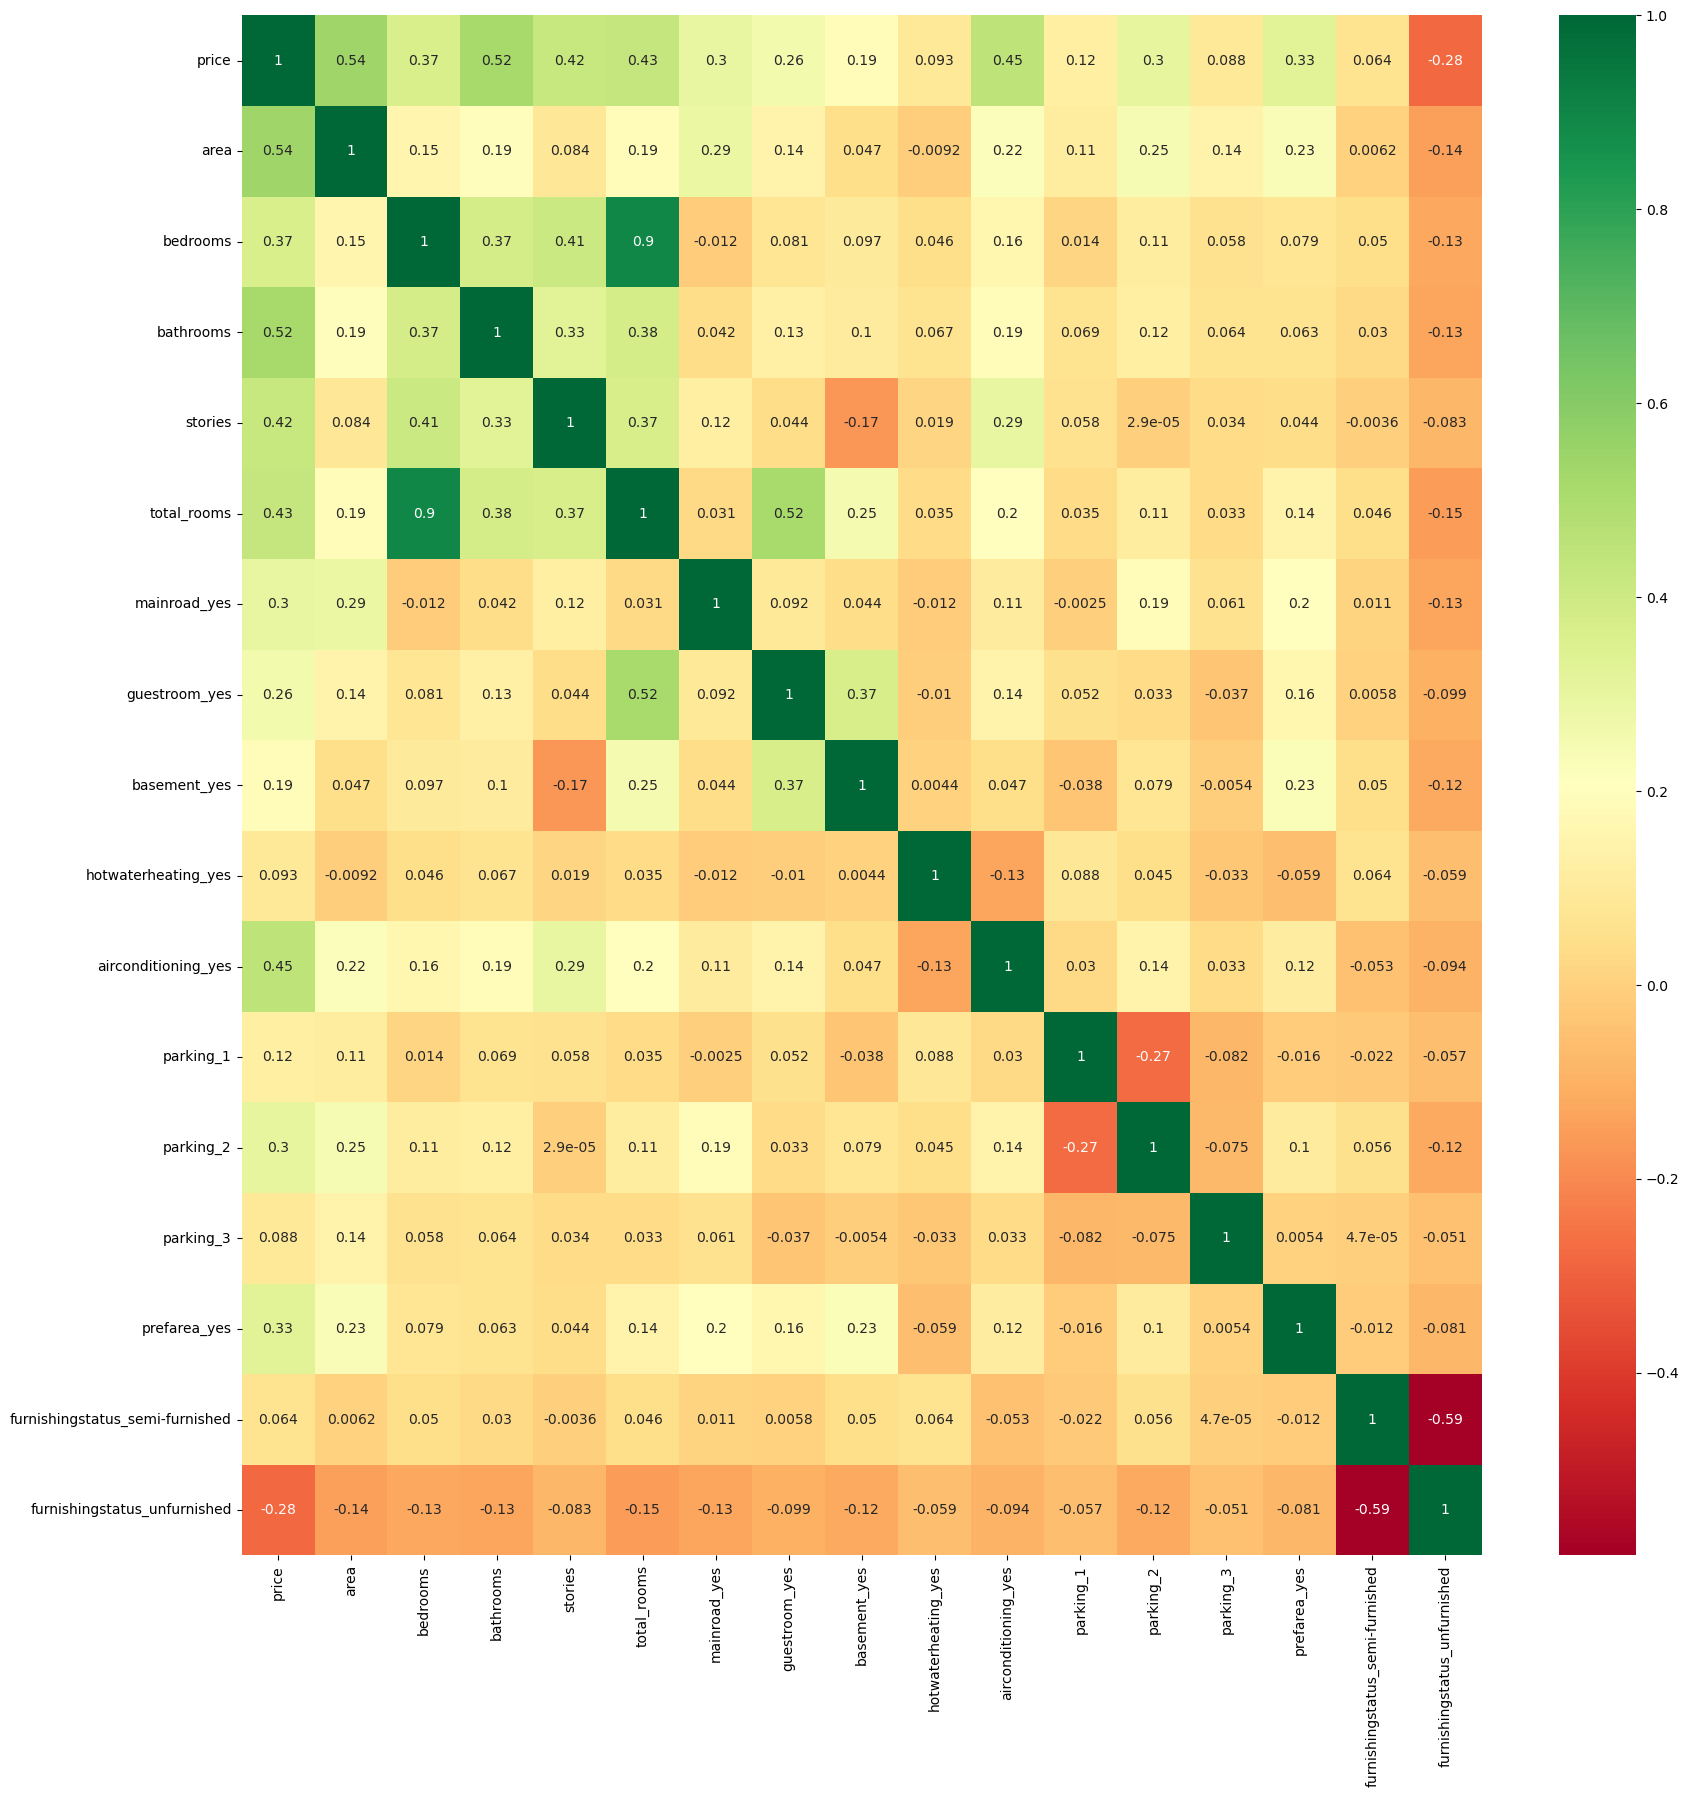

In [79]:
# Visualize the correlation between all features and price using a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(house_df_bool.corr(),annot=True,cmap = "RdYlGn")
plt.show()

### Calculate Feature Importance and Best Features for dependent Variables

In [59]:
# Separate features and target
X = house_df_bool.drop(columns=['price'])
y = house_df_bool['price']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Gradient Boosting Regressor as the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Get Feature Importances from the model
importances = gb_model.feature_importances_

# Create a DataFrame to combine feature names and their importance
feature_importance_house_df_bool = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select important features based on feature importances
selector = SelectFromModel(gb_model, threshold="mean", prefit=True)
X_selected = selector.transform(X_train)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

print("Feature Importance:")
print(feature_importance_house_df_bool)

Feature Importance:
                            Feature  Importance
0                              area    0.456150
2                         bathrooms    0.175526
9               airconditioning_yes    0.095482
4                       total_rooms    0.051066
3                           stories    0.038397
7                      basement_yes    0.029001
15     furnishingstatus_unfurnished    0.028290
13                     prefarea_yes    0.025044
11                        parking_2    0.016421
1                          bedrooms    0.015693
5                      mainroad_yes    0.015413
8               hotwaterheating_yes    0.014205
12                        parking_3    0.013497
6                     guestroom_yes    0.012639
10                        parking_1    0.010097
14  furnishingstatus_semi-furnished    0.003080


In [60]:
print("Selected Features (Boosting):", selected_features)

Selected Features (Boosting): Index(['area', 'bathrooms', 'airconditioning_yes'], dtype='object')


### Plot the feature importances using seaborn

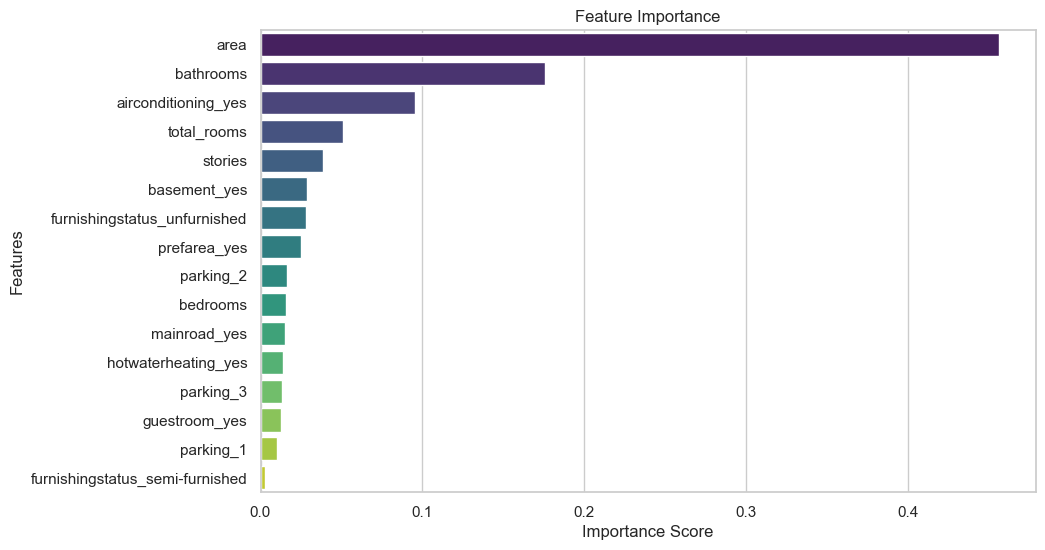


This feature importance plot shows that the area and number of bathrooms are the most significant factors 
influencing home prices. Other factors like air conditioning, total rooms, and the number of stories also have 
some impact, but their importance is much lower compared to area and bathrooms. Features such as parking, 
guest room availability, and furnishing status have the least influence on home prices.



In [98]:
# Plot the feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("""
This feature importance plot shows that the area and number of bathrooms are the most significant factors 
influencing home prices. Other factors like air conditioning, total rooms, and the number of stories also have 
some impact, but their importance is much lower compared to area and bathrooms. Features such as parking, 
guest room availability, and furnishing status have the least influence on home prices.
""")

## Scatterplot (Area vs Price)


The graph shows a positive correlation between the area of a home (in square feet) and its price, 
with larger areas generally leading to higher prices. The regression line suggests a trend of increasing 
prices as the area increases, although there is some variation in the data points around this trend.



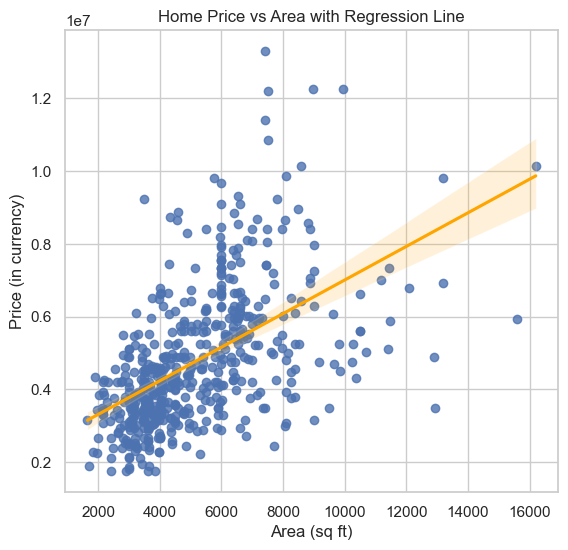

In [87]:
scatter_fig = px.scatter(house_df_bool, x='area', y='price', 
                         title='Relationship between Area and Price',
                         labels={'area': 'Area (sq ft)', 'price': 'Price'},
                         template='plotly_white')

# scatter_fig.show()
scatter_fig.write_html("area_price_scatter.html")

# Set the visual style
sns.set(style='whitegrid')

# Create a figure for the visuals
plt.figure(figsize=(14, 6))

# 1. Scatter plot for Home Price vs Area with regression line
plt.subplot(1, 2, 1)
sns.regplot(data=house_df, x='area', y='price', marker='o', color='b', line_kws={'color': 'orange'})
plt.title('Home Price vs Area with Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (in currency)')

print("""
The graph shows a positive correlation between the area of a home (in square feet) and its price, 
with larger areas generally leading to higher prices. The regression line suggests a trend of increasing 
prices as the area increases, although there is some variation in the data points around this trend.
""")

## Boxplot (Price across Number of Bathrooms)

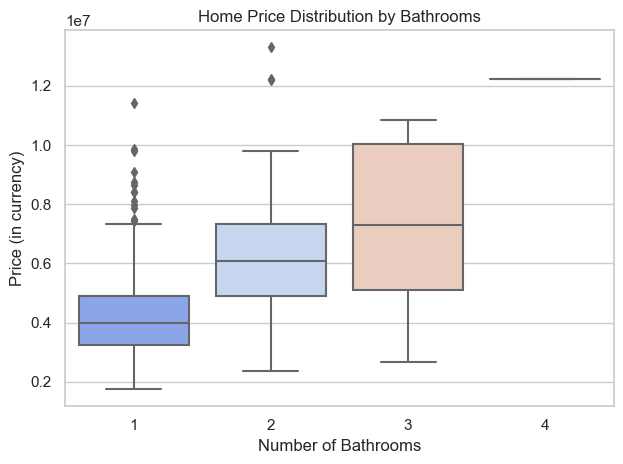


This box plot shows that home prices tend to increase as the number of bathrooms increases. 
Homes with 1 bathroom have the lowest median price, while homes with 3 and 4 bathrooms show higher median prices. 
There are a few outliers in the 1-bathroom category with higher prices, and the overall price variation 
widens as the number of bathrooms increases.



In [88]:
# Interactive Bar Plot
boxplot_fig = px.box(house_df_bool, x='bathrooms', y='price',
                     title='Boxplot of Price across Different Number of Bathrooms',
                     labels={'bedrooms': 'Number of Bathrooms', 'price': 'Price'},
                     template='plotly_white')

# boxplot_fig.show()
boxplot_fig.write_html("bathroom_price_box.html")

# 2. Box plot of Home Price based on the Bathrooms
plt.subplot(1, 1, 1)
sns.boxplot(data=house_df, x='bathrooms', y='price', palette='coolwarm')
plt.title('Home Price Distribution by Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in currency)')

plt.tight_layout()
plt.show()

print("""
This box plot shows that home prices tend to increase as the number of bathrooms increases. 
Homes with 1 bathroom have the lowest median price, while homes with 3 and 4 bathrooms show higher median prices. 
There are a few outliers in the 1-bathroom category with higher prices, and the overall price variation 
widens as the number of bathrooms increases.
""")

## Boxplot (Price across Number of Total Rooms)

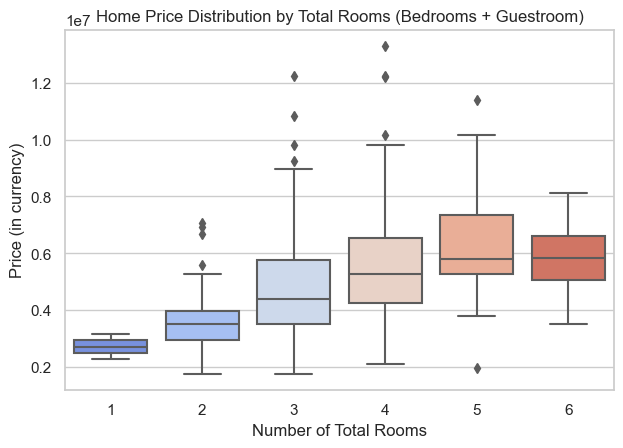


The box plot shows that home prices generally increase with the number of rooms. Homes with more rooms tend 
to have higher median prices, with more variation in prices as the room count goes up, especially from 4 
rooms onwards. There are also some outliers in the lower and higher price ranges.



In [89]:
# Interactive Bar Plot
boxplot_fig = px.box(house_df_bool, x='total_rooms', y='price',
                     title='Boxplot of Price across Different Number of Total Rooms (Bedrooms + Guestroom)',
                     labels={'total_rooms': 'Number of Total Rooms', 'price': 'Price'},
                     template='plotly_white')

# boxplot_fig.show()
boxplot_fig.write_html("total_rooms_price_box.html")

# 3. Box plot of Home Price based on the Total Rooms (Bedrooms + Guestroom)
plt.subplot(1, 1, 1)
sns.boxplot(data=house_df_bool, x='total_rooms', y='price', palette='coolwarm')
plt.title('Home Price Distribution by Total Rooms (Bedrooms + Guestroom)')
plt.xlabel('Number of Total Rooms')
plt.ylabel('Price (in currency)')

plt.tight_layout()
plt.show()

print("""
The box plot shows that home prices generally increase with the number of rooms. Homes with more rooms tend 
to have higher median prices, with more variation in prices as the room count goes up, especially from 4 
rooms onwards. There are also some outliers in the lower and higher price ranges.
""")

## Bar plot (Average Price per Number of Stories)

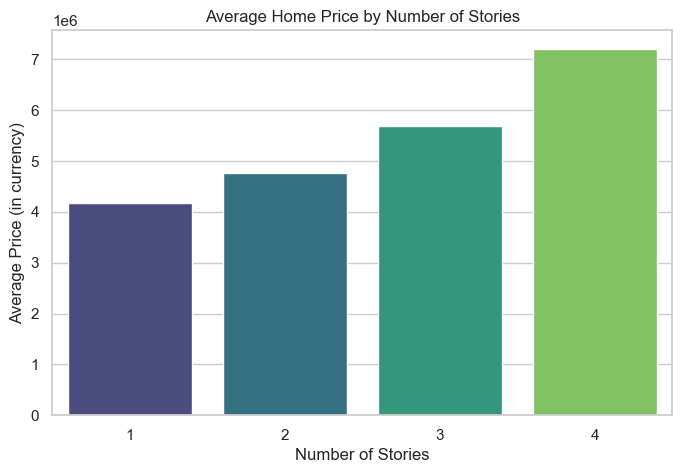


This bar chart shows that average home prices increase with the number of stories, with homes having 4 stories 
being the most expensive on average, followed by 3, 2, and 1-story homes.



In [90]:
avg_price_by_stories = house_df_bool.groupby('stories')['price'].mean().reset_index()

# Interactive Bar Plot
bar_fig = px.bar(avg_price_by_stories,
                 x='stories', y='price',
                 title='Average Price by Number of Stories',
                 labels={'stories': 'Number of Stories', 'price': 'Average Price'},
                 template='plotly_white')

# bar_fig.show()
bar_fig.write_html("stories_price_box.html")

# 4. Bar plot of Home Price based on the Stories
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_stories, x='stories', y='price', palette='viridis')
plt.title('Average Home Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Average Price (in currency)')
plt.show()

print("""
This bar chart shows that average home prices increase with the number of stories, with homes having 4 stories 
being the most expensive on average, followed by 3, 2, and 1-story homes.
""")

## Pie chart (Proportion of Houses with Air Conditioning)

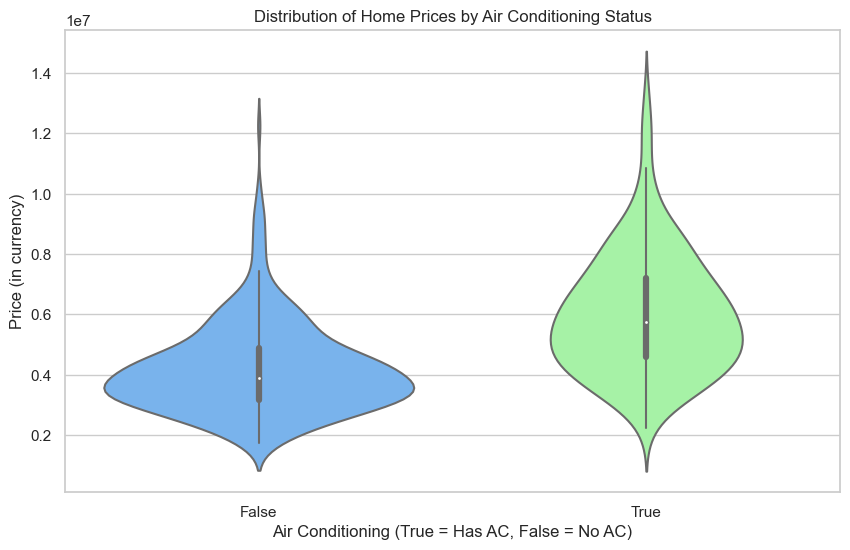


The violin plot shows that homes with air conditioning (True) tend to have slightly higher prices, with a 
broader distribution of prices compared to homes without air conditioning (False). The median price is similar 
for both categories, but homes without air conditioning show a wider range of lower-priced homes.



In [97]:
# Assuming your data is in a DataFrame called df, with 'AirConditioning' and 'Price' columns
plt.figure(figsize=(10,6))
sns.violinplot(x='airconditioning_yes', y='price', data=house_df_bool, palette=['#66b3ff', '#99ff99'])

plt.title('Distribution of Home Prices by Air Conditioning Status')
plt.xlabel('Air Conditioning (True = Has AC, False = No AC)')
plt.ylabel('Price (in currency)')
plt.show()

print("""
The violin plot shows that homes with air conditioning (True) tend to have slightly higher prices, with a 
broader distribution of prices compared to homes without air conditioning (False). The median price is similar 
for both categories, but homes without air conditioning show a wider range of lower-priced homes.
""")

## Future or Further Scope

In [ ]:
"""
1. Model Selection for Price Prediction:
2. Feature Engineering:
3. Cross-Validation and Model Optimization
4. Evaluation Metrics

"""